# Домашняя работа №2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from scipy.optimize import approx_fprime, fmin
from scipy.signal import find_peaks
from scipy.misc import derivative


### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


f'(x) =  4*sin(2*x+1)*cos(2*x+1) = 2*sin(2*(2*x+1)) = 2*sin(4*x+2) 

f''(x) = (2*sin(4*x+2))' = 8*cos(4*x+2)

или так

f''(x) = (4*sin(2*x+1)*cos(2*x+1))' = 8*cos(2*x+1)*cos(2*x+1) - 8sin(2*x+1)*sin(2*x+1) = 
8*(cos^2(2*x+1) - sin^2(2*x+1)) = 8*((1+cos(4*x+2))/2 - (1-cos(4*x+2))/2 ) = 8*cos(4*x+2)

In [129]:
x = np.array([i for i in range(-200, 200)])
y = np.array([math.sin(math.radians(2*x_i+1)) for x_i in x])

Text(0.5, 1.0, 'Исходная функция: (sin(2x+1))^2')

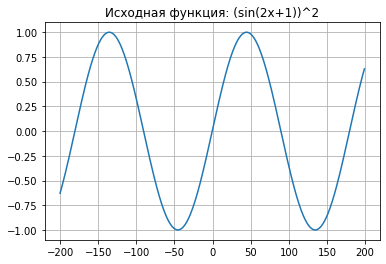

In [130]:
plt.plot(x, y)
plt.grid(True)
plt.title('Исходная функция: (sin(2x+1))^2')

Text(0.5, 1.0, 'Первая производная исходной функции: 2*sin(4*x+2)')

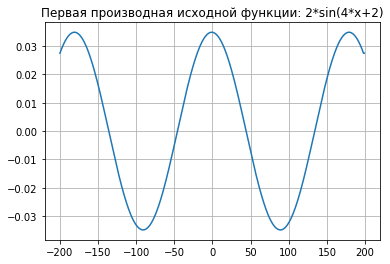

In [131]:
# Вычисляем первую производную так:
list_deriv_sin = []
for i in range(len(x)-1):
    list_deriv_sin.append((y[i+1]-y[i])/(x[i+1]-x[i]))
list_deriv_sin.append(list_deriv_sin[-1])
plt.plot(x, list_deriv_sin)
plt.grid(True)
plt.title('Первая производная исходной функции: 2*sin(4*x+2)')


Text(0.5, 1.0, 'Первая производная исходной функции: 2*sin(4*x+2)')

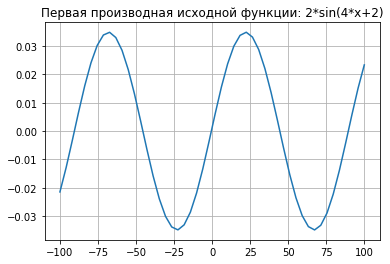

In [142]:
# Вычисляем первую производную так (второй вариант):
def f(x):
    return (math.sin(math.radians(2 * x + 1)))**2
# x = np.linspace(-100, 100)
y1 = [derivative(f, xx, n=1) for xx in x]
plt.plot(x, y1)
plt.grid(True)
plt.title('Первая производная исходной функции: 2*sin(4*x+2)')

Text(0.5, 1.0, 'Вторая производная исходной функции: 2*sin(4*x+2)')

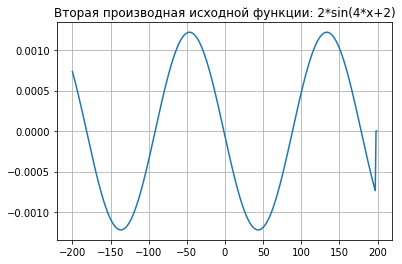

In [138]:
# Вычисляем вторую производную так:

list_second_deriv_sin = []
for i in range(len(x)-1):
    list_second_deriv_sin.append((list_deriv_sin[i+1]-list_deriv_sin[i])/(x[i+1]-x[i]))
list_second_deriv_sin.append(list_second_deriv_sin[-1])
plt.plot(x, list_second_deriv_sin)
plt.grid(True)
plt.title('Вторая производная исходной функции: 2*sin(4*x+2)')

Text(0.5, 1.0, 'Вторая производная исходной функции: 2*sin(4*x+2)')

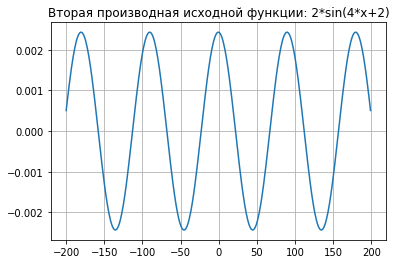

In [134]:
# Вычисляем вторую производную так (второй вариант):
def f(x):
    return math.sin(math.radians(2 * x + 1))**2
# x = np.linspace(-100, 100)
y2 = [derivative(f, xx, n=2) for xx in x]
plt.plot(x, y2)
plt.grid(True)
plt.title('Вторая производная исходной функции: 2*sin(4*x+2)')

### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

f'x = 4*x*y^3 -1 + y^2
f'x(1,2) = 4*1*2^3 - 1 + 2^2 = 35

f'y = 6*x^2*y^2 + 2*y*x
f'y(1,2) = 6*1*2^2 + 2*2*1 = 28

𝑔𝑟𝑎𝑑 𝑓(1,2) = (35,28)

In [4]:
def func(x, c0, c1, c2):
    return c0*((x[0])**2*(x[1])**3)+(c1/(x[0]))+(x[1])**2*(x[0])+c2
     

In [5]:
x = np.array([1, 2])
c0, c1, c2 = (2, 1, 7)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1, c2)

array([35.00000024, 28.00000024])

### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [7]:
import pandas as pd
data = pd.read_csv('video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


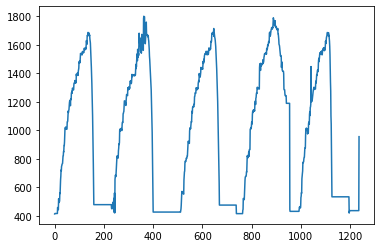

In [8]:
plt.plot(data.sec, data.height)

In [23]:
data.height *= -1 


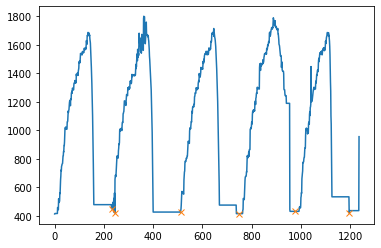

In [32]:
peaks, _ = find_peaks(data.height, width=20)
plt.plot(-(data.height))
plt.plot(peaks, -(data.height[peaks]), "x")
plt.show()